# Data Preprocessing for Enedis Challenge

This notebook handles the initial data loading and cleaning steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## Loading datasets 

For **X_train** :

Each column = a sensor, network point, or aggregate  
The IDs are anonymized (hash)  
The values = aggregated power or energy  
(often in kW or kWh over 30 min)  

Basically, it gives us the consumption of a station,  
the sum of several clients, or a local network flow  


with the lack of certain data we can see Xtrain as:  
Here is everything I measure on the network EXCEPT for certain specific customer consumption that I want to reconstruct  


For **Y_train** :

Individual real consumption  
Each column = a client  
Each value = energy consumed over 30 min  


Overall view :

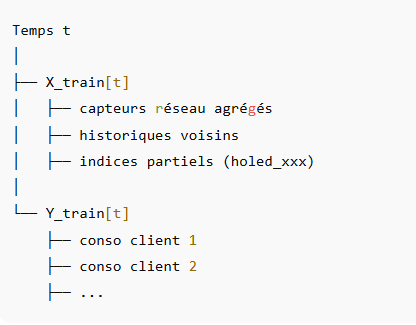


In [13]:
train_df = pd.read_csv('data/X_train_78VdSWL.csv')
test_df = pd.read_csv('data/X_test_XKVc4no.csv')
target_df = pd.read_csv('data/y_train_u0UkKEh.csv')

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"Target shape: {target_df.shape}")

Train shape: (1057, 21001)
Test shape: (1057, 38141)
Target shape: (1057, 1001)


In [14]:
display(train_df.head())
display(test_df.head())
display(target_df.head())

,Horodate,5423908671,2568793410,8310762594,6235194807,423895617,193845276,216589743,218753964,1794650328,...,holed_991,holed_992,holed_993,holed_994,holed_995,holed_996,holed_997,holed_998,holed_999,holed_1000
0,2023-01-09 00:00:00,352.0,0.0,371.0,110.0,724.0,102.0,256.0,7.0,105.0,...,0.0,32.0,152.0,NaN,0.0,1099.0,117.0,45.0,253.0,186.0
1,2023-01-09 00:30:00,405.0,0.0,363.0,108.0,478.0,147.0,281.0,8.0,134.0,...,0.0,34.0,84.0,NaN,NaN,782.0,109.0,40.0,227.0,180.0
2,2023-01-09 01:00:00,599.0,0.0,352.0,93.0,832.0,155.0,295.0,5.0,96.0,...,0.0,30.0,24.0,NaN,0.0,630.0,375.0,58.0,237.0,166.0
3,2023-01-09 01:30:00,315.0,0.0,348.0,84.0,574.0,152.0,267.0,15.0,156.0,...,0.0,34.0,24.0,NaN,0.0,773.0,468.0,48.0,245.0,525.0
4,2023-01-09 02:00:00,448.0,0.0,364.0,73.0,421.0,176.0,346.0,38.0,97.0,...,0.0,30.0,46.0,NaN,0.0,879.0,534.0,41.0,175.0,372.0


,Horodate,123476859,123596487,123798654,123875946,123879645,123897645,123947865,124367958,124568973,...,holed_991,holed_992,holed_993,holed_994,holed_995,holed_996,holed_997,holed_998,holed_999,holed_1000
0,2023-01-09 00:00:00,102.0,992.0,365.0,252.0,71.0,132.0,30.0,201.0,121.0,...,38.0,168.0,32.0,NaN,445.0,NaN,NaN,767.0,2029.0,129.0
1,2023-01-09 00:30:00,89.0,996.0,351.0,219.0,47.0,140.0,31.0,173.0,186.0,...,27.0,82.0,48.0,NaN,492.0,207.0,NaN,773.0,1698.0,113.0
2,2023-01-09 01:00:00,134.0,841.0,314.0,213.0,55.0,114.0,38.0,204.0,251.0,...,37.0,102.0,44.0,NaN,461.0,218.0,NaN,613.0,1737.0,NaN
3,2023-01-09 01:30:00,130.0,961.0,228.0,253.0,35.0,103.0,35.0,176.0,305.0,...,13.0,78.0,33.0,NaN,491.0,104.0,NaN,691.0,994.0,135.0
4,2023-01-09 02:00:00,135.0,949.0,213.0,243.0,47.0,472.0,21.0,187.0,283.0,...,62.0,107.0,36.0,NaN,451.0,97.0,NaN,844.0,1044.0,NaN


,Horodate,holed_1,holed_2,holed_3,holed_4,holed_5,holed_6,holed_7,holed_8,holed_9,...,holed_991,holed_992,holed_993,holed_994,holed_995,holed_996,holed_997,holed_998,holed_999,holed_1000
0,2023-01-09 00:00:00,578.0,698.0,17.0,2.0,283.0,154.0,131.0,619.0,107.0,...,0.0,32.0,152.0,121.0,0.0,1099.0,117.0,45.0,253.0,186.0
1,2023-01-09 00:30:00,533.0,224.0,18.0,2.0,1047.0,150.0,106.0,542.0,114.0,...,0.0,34.0,84.0,107.0,0.0,782.0,109.0,40.0,227.0,180.0
2,2023-01-09 01:00:00,623.0,246.0,17.0,5.0,1185.0,131.0,74.0,517.0,109.0,...,0.0,30.0,24.0,128.0,0.0,630.0,375.0,58.0,237.0,166.0
3,2023-01-09 01:30:00,613.0,643.0,17.0,18.0,746.0,77.0,146.0,455.0,113.0,...,0.0,34.0,24.0,200.0,0.0,773.0,468.0,48.0,245.0,525.0
4,2023-01-09 02:00:00,1823.0,318.0,18.0,15.0,560.0,125.0,82.0,551.0,104.0,...,0.0,30.0,46.0,792.0,0.0,879.0,534.0,41.0,175.0,372.0


## Setting timestamps as index

In [5]:
for df in [train_df, test_df, target_df]:
    df.set_index(df.columns[0], inplace=True)

## Completing training data with ground truth values

In [ ]:
train_df = train_df.fillna(target_df)

na_cols = train_df.columns[train_df.isna().any()]
print(f"Columns still containing NaN: {list(na_cols)}")

train_df = train_df.drop(columns=na_cols) 

Columns still containing NaN: ['7986541023', 'holed_192']


## Encoding holed series with unique identifiers

In [7]:
holed_series = train_df.columns[-999:]
new_names = {name: f"{2001+i}" for i, name in enumerate(holed_series)}
train_df = train_df.rename(columns=new_names)

## Separating prediction target from additional training data

Last 1000 series are the ones we need to predict.

In [8]:
prediction_target = test_df[test_df.columns[-1000:]]
extra_train = test_df[test_df.columns[:-1000]]

print(f"Target for submission: {prediction_target.shape}")
print(f"Extra training series: {extra_train.shape}")

Target for submission: (1057, 1000)
Extra training series: (1057, 37140)


## Removing corrupted series from extra training data

In [9]:
corrupted = extra_train.columns[extra_train.isna().any()]
print(f"Removing {len(corrupted)} corrupted series")
extra_train = extra_train.drop(columns=corrupted)

Removing 4 corrupted series


## Checking for duplicate series IDs

In [10]:
train_ids = set(train_df.columns)
extra_ids = set(extra_train.columns)

overlap = train_ids.intersection(extra_ids)
if not overlap:
    print("✓ All series have unique identifiers")
else:
    print(f"⚠ Warning: {len(overlap)} duplicate IDs found")

✓ All series have unique identifiers


## Consolidating all training data and exporting

In [11]:
complete_train = pd.concat([train_df, extra_train], axis=1)

complete_train.to_csv("merged_train.csv")
prediction_target.to_csv("test_data.csv")

print(f"\nFinal training dataset: {complete_train.shape}")
print(f"Prediction target dataset: {prediction_target.shape}")
print("\n✓ Export completed successfully")


Final training dataset: (1057, 58134)
Prediction target dataset: (1057, 1000)

✓ Export completed successfully


In [12]:
display(complete_train.head())
display(prediction_target.head())

,5423908671,2568793410,8310762594,6235194807,423895617,193845276,216589743,218753964,1794650328,9253476180,...,9876054312,9876310254,9876345102,9876352014,9876405231,9876431250,9876431520,9876520413,9876541032,9876542310
Horodate,,,,,,,,,,,,,,,,,,,,,
2023-01-09 00:00:00,352.0,0.0,371.0,110.0,724.0,102.0,256.0,7.0,105.0,44.0,...,675.0,429.0,515.0,68.0,1132.0,437.0,446.0,46.0,361.0,172.0
2023-01-09 00:30:00,405.0,0.0,363.0,108.0,478.0,147.0,281.0,8.0,134.0,36.0,...,685.0,451.0,342.0,65.0,52.0,570.0,683.0,42.0,293.0,28.0
2023-01-09 01:00:00,599.0,0.0,352.0,93.0,832.0,155.0,295.0,5.0,96.0,22.0,...,681.0,424.0,64.0,65.0,94.0,614.0,678.0,35.0,301.0,599.0
2023-01-09 01:30:00,315.0,0.0,348.0,84.0,574.0,152.0,267.0,15.0,156.0,12.0,...,683.0,553.0,190.0,64.0,24.0,259.0,567.0,29.0,325.0,211.0
2023-01-09 02:00:00,448.0,0.0,364.0,73.0,421.0,176.0,346.0,38.0,97.0,24.0,...,644.0,713.0,528.0,70.0,36.0,261.0,1184.0,28.0,348.0,3303.0


,holed_1,holed_2,holed_3,holed_4,holed_5,holed_6,holed_7,holed_8,holed_9,holed_10,...,holed_991,holed_992,holed_993,holed_994,holed_995,holed_996,holed_997,holed_998,holed_999,holed_1000
Horodate,,,,,,,,,,,,,,,,,,,,,
2023-01-09 00:00:00,1061.0,NaN,NaN,20.0,NaN,148.0,70.0,183.0,88.0,NaN,...,38.0,168.0,32.0,NaN,445.0,NaN,NaN,767.0,2029.0,129.0
2023-01-09 00:30:00,1041.0,NaN,99.0,42.0,138.0,164.0,59.0,170.0,83.0,NaN,...,27.0,82.0,48.0,NaN,492.0,207.0,NaN,773.0,1698.0,113.0
2023-01-09 01:00:00,995.0,NaN,105.0,19.0,145.0,93.0,119.0,403.0,60.0,NaN,...,37.0,102.0,44.0,NaN,461.0,218.0,NaN,613.0,1737.0,NaN
2023-01-09 01:30:00,998.0,NaN,NaN,34.0,270.0,126.0,505.0,489.0,66.0,NaN,...,13.0,78.0,33.0,NaN,491.0,104.0,NaN,691.0,994.0,135.0
2023-01-09 02:00:00,NaN,NaN,107.0,21.0,309.0,1279.0,395.0,288.0,46.0,NaN,...,62.0,107.0,36.0,NaN,451.0,97.0,NaN,844.0,1044.0,NaN
